In [9]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from time import time
import os
import sys
from os.path import join, abspath
parent_dir = os.path.dirname(os.getcwd())
root_dir = abspath(join(parent_dir, '..'))
current_dir = os.path.curdir
sys.path.append(root_dir)
from mcmc import utils
from init import init
utils.style('seaborn-v0_8-bright')

In [52]:
data_kind = 2

zdata = np.loadtxt(join(parent_dir, 'data', f'z{data_kind}.csv'), skiprows=1, delimiter=',')
zmid = zdata[:, 0]
znum = zdata[:, 1]
zerr = zdata[:, 2]
dz = np.min(np.diff(zmid))

wdata = np.loadtxt(join(parent_dir, 'data', f'w{data_kind}.csv'), skiprows=1, delimiter=',')
wmid = wdata[:, 0]
wnum = wdata[:, 1]
werr = wdata[:, 2]
dw = np.min(np.diff(wmid))

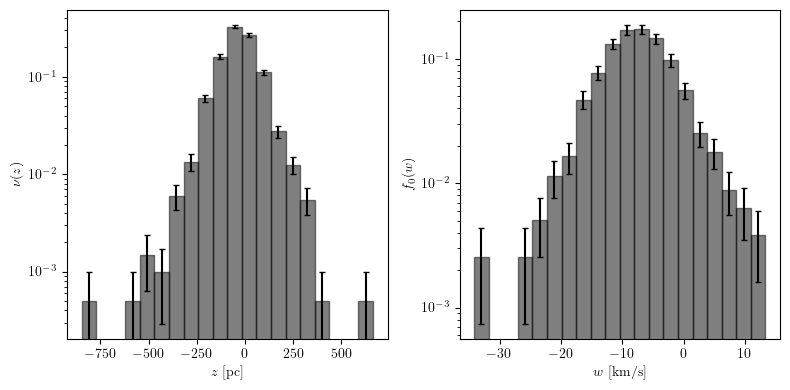

In [53]:
# bar plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].bar(zmid, znum, width=dz, yerr=zerr, color='k', alpha=0.5, ec='k', capsize=2)
ax[1].bar(wmid, wnum, width=dw, yerr=werr, color='k', alpha=0.5, ec='k', capsize=2)
ax[0].set_xlabel(r'$z$ [pc]')
ax[1].set_xlabel(r'$w$ [km/s]')
ax[0].set_ylabel(r'$\nu (z)$')
ax[1].set_ylabel(r'$f_0(w)$')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
plt.tight_layout()
plt.show()

# singgle gaussian

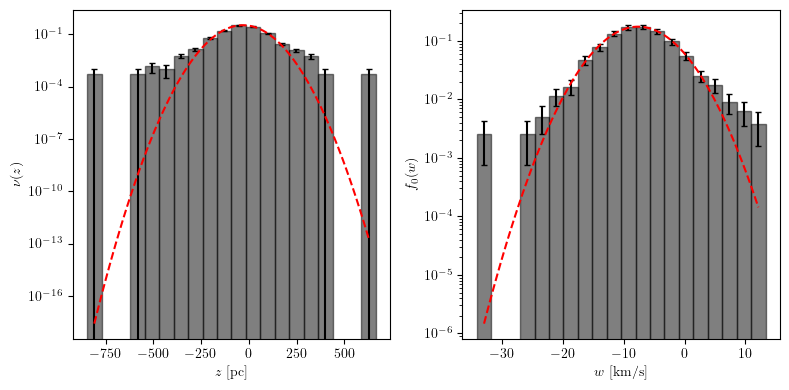

(array([-30.83945101,  87.70029674,  72.35798249]),
 array([-7.64439039,  5.24190509,  2.3006554 ]))

In [54]:


def gauss(x, mu, sigma, A):
    return A * norm.pdf(x, mu, sigma)

poptz, _ = curve_fit(gauss, zmid, znum, p0=[0, 100, 1])
poptw, _ = curve_fit(gauss, wmid, wnum, p0=[0, 10, 1])

zs = np.linspace(zmid.min(), zmid.max(), 100)
ws = np.linspace(wmid.min(), wmid.max(), 100)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].bar(zmid, znum, width=dz, yerr=zerr, color='k', alpha=0.5, ec='k', capsize=2)
ax[0].plot(zs, gauss(zs, *poptz), 'r--')
ax[1].bar(wmid, wnum, width=dw, yerr=werr, color='k', alpha=0.5, ec='k', capsize=2)
ax[1].plot(ws, gauss(ws, *poptw), 'r--')
ax[0].set_xlabel(r'$z$ [pc]')
ax[1].set_xlabel(r'$w$ [km/s]')
ax[0].set_ylabel(r'$\nu (z)$')
ax[1].set_ylabel(r'$f_0(w)$')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
plt.tight_layout()
plt.show()
poptz, poptw

In [55]:
log_nu0 = np.log(poptz[2]/(np.sqrt(2*np.pi)*poptz[1]))
log_sigmaw1 = np.log(poptw[1])
log_a1 = np.log(poptw[2])

locs = dict(
    rhoDM=-0.02,
    log_nu0=log_nu0-1,
    R=3.4E-3,
    zsun=-50,
    w0=-10,
    log_sigmaw1=log_sigmaw1-1,
    log_a1=log_a1-1,
)

scales = dict(
    rhoDM=0.12,
    log_nu0=2,
    R=0.6E-3,
    zsun=100,
    w0=5,
    log_sigmaw1=2,
    log_a1=2,
)

# double gaussian

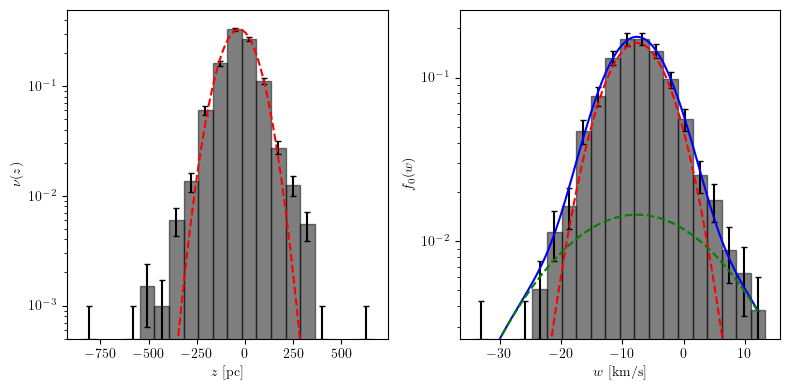

(array([-30.83945101,  87.70029674,  72.35798249]),
 array([-7.64844523,  4.83125585,  1.97487473, 11.95276667,  0.43484031]))

In [56]:
def dgauss(x, mu, sigma1, A1, sigma2, A2):
    return A1 * norm.pdf(x, mu, sigma1) + A2 * norm.pdf(x, mu, sigma2)

poptz, _ = curve_fit(gauss, zmid, znum, p0=[0, 100, 1])
poptw, _ = curve_fit(dgauss, wmid, wnum, p0=[0, 5, 1, 10, 0.2])

zs = np.linspace(zmid.min(), zmid.max(), 100)
ws = np.linspace(wmid.min(), wmid.max(), 100)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].bar(zmid, znum, width=dz, yerr=zerr, color='k', alpha=0.5, ec='k', capsize=2)
ax[0].plot(zs, gauss(zs, *poptz), 'r--')
ax[1].bar(wmid, wnum, width=dw, yerr=werr, color='k', alpha=0.5, ec='k', capsize=2)
ax[1].plot(ws, dgauss(ws, *poptw), 'b')
ax[1].plot(ws, gauss(ws, poptw[0], poptw[1], poptw[2]), 'r--')
ax[1].plot(ws, gauss(ws, poptw[0], poptw[3], poptw[4]), 'g--')
ax[0].set_xlabel(r'$z$ [pc]')
ax[1].set_xlabel(r'$w$ [km/s]')
ax[0].set_ylabel(r'$\nu (z)$')
ax[1].set_ylabel(r'$f_0(w)$')
ax[0].set_ylim(np.min(znum), np.max(znum)*1.5)
ax[1].set_ylim(np.min(wnum), np.max(wnum)*1.5)
ax[0].set_yscale('log')
ax[1].set_yscale('log')
plt.tight_layout()
plt.show()
poptz, poptw

In [57]:
log_nu0 = np.log(poptz[2]/(np.sqrt(2*np.pi)*poptz[1]))
log_sigmaw1 = np.log(poptw[1])
log_a1 = np.log(poptw[2])
log_sigmaw2 = np.log(poptw[3])
log_a2 = np.log(poptw[4])

locs = dict(
    rhoDM=-0.02,
    log_nu0=log_nu0-1,
    R=3.4E-3,
    zsun=-50,
    w0=-10,
    log_sigmaw1=log_sigmaw1-1,
    log_a1=log_a1-1,
    log_sigmaw2=log_sigmaw2-1,
    log_a2=log_a2-1,
)

scales = dict(
    rhoDM=0.12,
    log_nu0=2,
    R=0.6E-3,
    zsun=100,
    w0=5,
    log_sigmaw1=2,
    log_a1=2,
    log_sigmaw2=2,
    log_a2=2,
)